# Лабораторная работа по модулю “Построение моделей”
1. Загрузить данные из папки Data Folder
2. Провести описательный анализ предложенных данных
3. Предложить стратегию по работе с категориальными переменными
4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)
5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)
6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)
7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)
8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага
9. Рассчитать Feature Importances для переменных модели
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Построить Confusion Matrix для ваших результатов
12. Загрузить ipython notebook с результатами работы на github репозиторий

*Пункты, показавшиеся вам сложными, либо которые вы не знаете можно пропускать, но с пометкой в ноутбуке, что
показалось сложным и непонятным в данном пункте для вас. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

In [28]:
# уберем назойливые предупреждения
import warnings
warnings.filterwarnings("ignore")

### 1. Загрузить данные из папки Data Folder

In [3]:
col_names = ['country', 'landmass', 'zone', 'area', 'population', 'languag', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'dominantcolour', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'traingle', 'icon', 'animate', 'text', 'topleftcolour', 'botrightcolor']

In [4]:
data = pd.read_csv('flag_data.scv')
data.columns = col_names

### 2. Провести описательный анализ предложенных данных

In [5]:
data.head().T

,0,1,2,3,4
country,Albania,Algeria,American-Samoa,Andorra,Angola
landmass,3,4,6,3,4
zone,1,1,3,1,2
area,29,2388,0,0,1247
population,3,20,0,0,7
languag,6,8,1,6,10
religion,6,2,1,0,5
bars,0,2,0,3,0
stripes,0,0,0,0,2
colours,3,3,5,3,3


In [6]:
# от country  немного пользы для задачи, удалим
data = data.drop('country', axis = 1)

### 3. Предложить стратегию по работе с категориальными переменными 

In [7]:
# большинство категориальных признаков уже зашифрованы, посмотрим, что осталось не обработанным
сategorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
сategorical_columns

['dominantcolour', 'topleftcolour', 'botrightcolor']

In [8]:
# обработаем их через get dummies
for x in сategorical_columns:
    data = pd.concat([data, pd.get_dummies(data[x], prefix=x)], axis=1)
    data = data.drop(x, axis=1)

In [9]:
# фичей немного
data.shape

(193, 49)

### 4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

In [10]:
corr = data.corr()

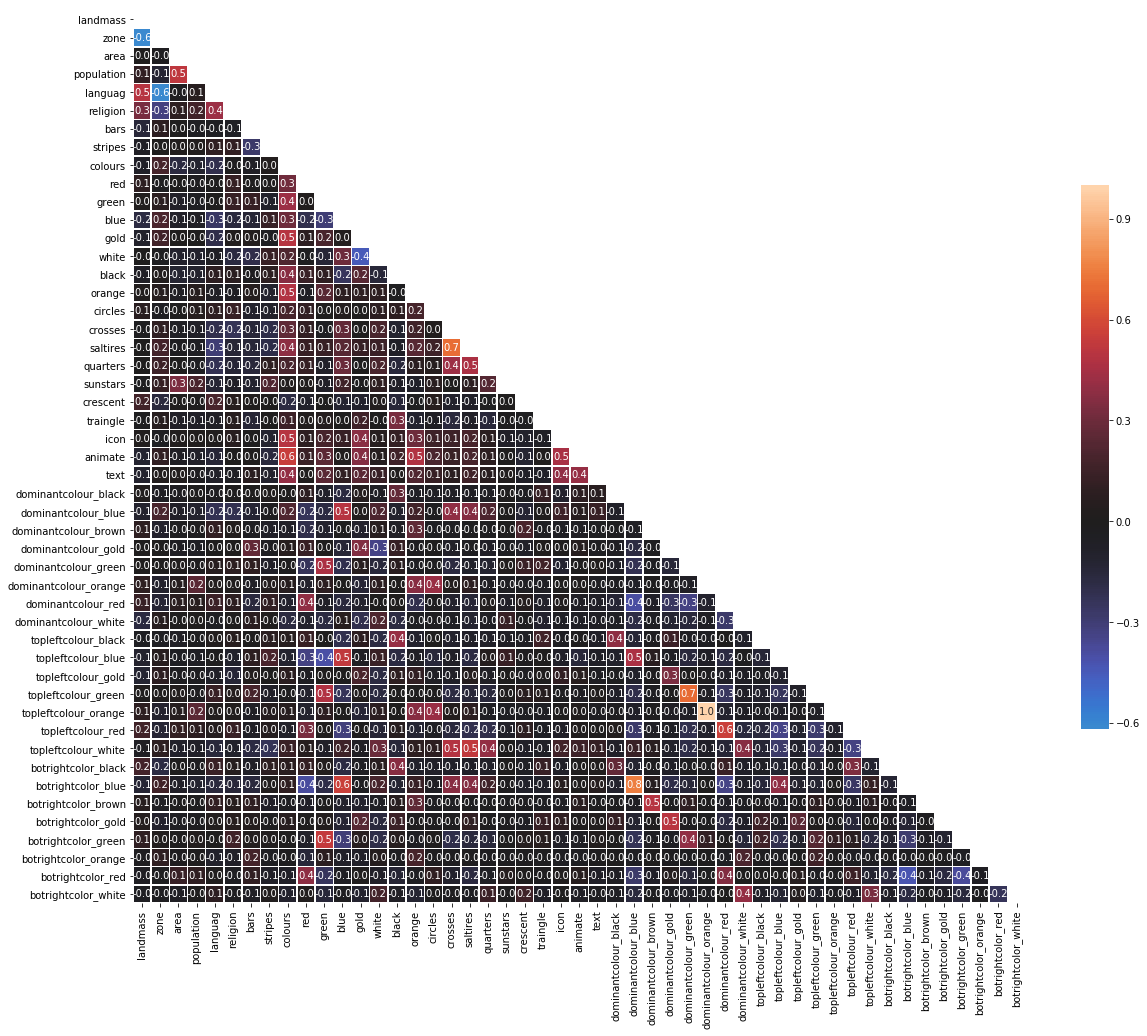

In [11]:
# есть взаимосвязь между цветами элементов флага и доминирующим цветом, что вполне логично,
# других сильных зависимостей не видно

plt.figure(figsize=(20,20))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [13]:
# самая большая корреляция религии с языком, континентом, зоной, крестами
# тем не менее, у всех них корреляция <0.5, что говорит о наличии слабой зависимости.
corr.abs().sort_values(by='religion', ascending=False).religion.head()

religion    1.000000
languag     0.424937
landmass    0.326243
zone        0.321709
crosses     0.225518
Name: religion, dtype: float64

In [55]:
# посмотрим рановмерность распределния по группам
data_pair_plot = data[['religion','languag', 'landmass', 'zone','crosses']]

language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others 

religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 

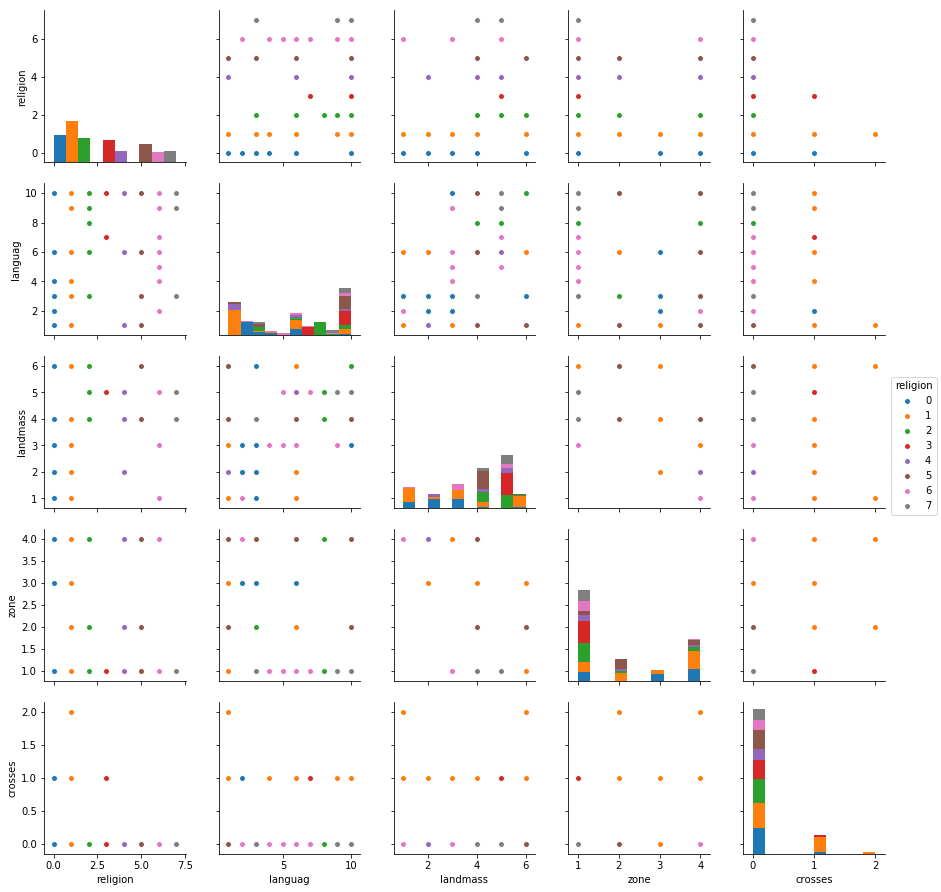

In [57]:
# Английский язык определяет принадлежность к христианам, Испанский к католикам, Арабский к мусультманам, Китайский - к буддистам
# наличие крестов указывает на христиан
# остальные признаки не однозначные, к одной группе может относиться сразу несколько религий
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data_pair_plot, hue='religion');

### 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

In [16]:
# датасет небольшой, нет проблем с обработкой, оставим пока как есть
# относительно уменьшения размерности: интересно, что оставит PCA без существенной потери качества

### 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

In [17]:
# мало данных по буддистам,хинди и Others, по ним скорее всего модель будет недообучена, 
# чтобы правильно научить модель их распознавать, как вариант, можно искусственно размножить малопредставленные группы. 
# как показала практика, да, результаты значительно улучшились после устранения undersampling.

In [18]:
data.religion.value_counts()

1    60
0    40
2    35
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

In [19]:
data_t = data.copy()

In [20]:
rare_religions = [3,4,7]

In [21]:
# искусственно создаем дубликаты редких классов
for i in range(3):
    data_t = data_t.append(data[data.religion.isin(rare_religions)==True])

In [23]:
data_t.shape

(241, 49)

In [24]:
#перемешаем данные
data_t = data_t.sample(frac=1).reset_index(drop=True)

In [25]:
data = data_t.copy()

### 7.  Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [30]:
X = data.drop('religion', axis = 1)
y = data['religion']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [32]:
clf = RandomForestClassifier()

In [33]:
# точность дерева не ахти
scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
scores.mean()

0.727444392956441

In [34]:
# не теряем надежды, попробуем
import xgboost

In [35]:
clf = xgboost.XGBClassifier()

In [36]:
# xgboost оказался немного лучше, с ним и пойдем дальше
scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
scores.mean()

0.8015163216970445

### 8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага

In [118]:
# призовем на помощь gridsearch для поиска наиболее подходящих гипер-параметров

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [38]:
clf = xgboost.XGBClassifier(objective='multi:softmax')

In [40]:
grid = {'max_depth': np.arange(4, 6),
        'learning_rate': [0.01, 0.1, 1],
        'n_estimators': np.arange(4, 12),
        }

gridsearch = GridSearchCV(clf, grid, scoring='accuracy', cv=3, n_jobs=-1)

In [41]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([4, 5]), 'learning_rate': [0.01, 0.1, 1], 'n_estimators': array([ 4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
gridsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=11,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
# посмотрим на 5-ку лучших вариантов, они вообще не отличаются по score 0_о - *** И КАК С ЭТИМ БЫТЬ?!
sorted(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']), key = lambda x: -x[0])[:5]

[(0.6726190476190477,
  {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 11}),
 (0.6666666666666666, {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 5}),
 (0.6666666666666666,
  {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 10}),
 (0.6666666666666666, {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 9}),
 (0.6666666666666666,
  {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 10})]

In [44]:
clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=11,
       n_jobs=1, nthread=None, objective='multi:sofprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
# Test score сильно отличается от Train, признак переобученности
# но он итоговый Test score все равно подрос, что хорошо
clf.fit(X_train, y_train)
print('Train accuracy:', accuracy_score(y_train, clf.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 1.0
Test accuracy: 0.8767123287671232


### 9. Рассчитать Feature Importances для переменных модели

In [46]:
feat_imp = pd.DataFrame(X.columns, columns=['feature'])
feat_imp['importance'] = clf.feature_importances_

In [47]:
# неожиданно на первом месте area и дальше population. Остальные более предсказуемые
feat_imp.sort_values(by='importance', ascending=False).head()

,feature,importance
2,area,0.181598
3,population,0.113801
4,languag,0.096852
0,landmass,0.077482
1,zone,0.050847


### 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [49]:
print('Test accuracy:', accuracy_score(y_test, clf.predict(X_test)))
print('Test f1:', f1_score(y_test, clf.predict(X_test),average='weighted'))
print('Test precision_score:', precision_score(y_test, clf.predict(X_test),average='weighted'))
print('Test recall_score:', recall_score(y_test, clf.predict(X_test),average='weighted'))

Test accuracy: 0.8767123287671232
Test f1: 0.8491551728001995
Test precision_score: 0.8376919883769199
Test recall_score: 0.8767123287671232


### 11. Построить Confusion Matrix для ваших результатов 

In [50]:
from sklearn.metrics import confusion_matrix

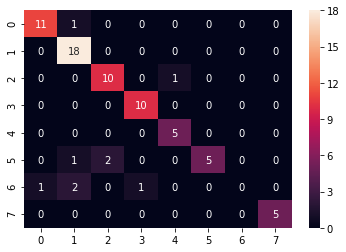

In [51]:
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)),annot=True)

religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 

в стартовом датасете модель была неспособна обнаруживать религии 3,4 и 7, из-за этого test accuracy ограничивался 63-67%.
после искусственного увеличения примеров в 4 раза по религиям 3,4 и 7 test accuracy существенно вырос до 78-88%, это ли не магия :)